In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
#načítanie datasetu
data = pd.read_csv("dataset_stroke.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#z datasetu je zrejmé, že posledná osoba ktorá mala mrtvicu má "id" 43424
#ked si danú osobu vypíšeme, zistíme, že prvých 249 záznamov v datasete malo mrtvicu (potom sú už len 0)
last_person_with_stroke = data[data["id"]==43424]
last_person_with_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
248,43424,Female,78.0,0,0,Yes,Private,Rural,78.81,19.6,Unknown,1


In [5]:
#zahodíme nepotrebné stĺpce, aby sme pracovali len s faktormi, ktoré nás zaujímajú
data = data.drop(data.columns[[0, 6, 7, 8, 9, 10]], axis=1)

In [6]:
data

,gender,age,hypertension,heart_disease,ever_married,stroke
0,Male,67.0,0,1,Yes,1
1,Female,61.0,0,0,Yes,1
2,Male,80.0,0,1,Yes,1
3,Female,49.0,0,0,Yes,1
4,Female,79.0,1,0,Yes,1
...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,0
5106,Female,81.0,0,0,Yes,0
5107,Female,35.0,0,0,Yes,0
5108,Male,51.0,0,0,Yes,0


In [7]:
#zoberieme prvých 496 záznamov, polovica mala mrtvicu, druhá nie
data = data.head(496)

In [8]:
data

,gender,age,hypertension,heart_disease,ever_married,stroke
0,Male,67.0,0,1,Yes,1
1,Female,61.0,0,0,Yes,1
2,Male,80.0,0,1,Yes,1
3,Female,49.0,0,0,Yes,1
4,Female,79.0,1,0,Yes,1
...,...,...,...,...,...,...
491,Male,60.0,0,0,Yes,0
492,Male,74.0,0,0,Yes,0
493,Female,23.0,0,0,No,0
494,Female,55.0,0,0,Yes,0


In [9]:
#zistíme najmenší vek respondenta = 0.64 rokov
data[data["age"]==data["age"].min()]

,gender,age,hypertension,heart_disease,ever_married,stroke
363,Female,0.64,0,0,No,0


In [10]:
#zistíme najväčší vek respondenta = 82 rokov
data[data["age"]==data["age"].max()]

,gender,age,hypertension,heart_disease,ever_married,stroke
23,Male,82.0,0,1,Yes,1
32,Female,82.0,1,0,Yes,1
35,Female,82.0,1,1,No,1
42,Male,82.0,0,1,Yes,1
56,Female,82.0,0,0,Yes,1
128,Male,82.0,0,0,Yes,1
140,Male,82.0,0,1,Yes,1
187,Female,82.0,1,1,Yes,1
188,Male,82.0,0,0,Yes,1
337,Female,82.0,0,1,No,0


In [11]:
#preštylizujeme si dáta, kedže neuronová sieť nevie pracovať so Stringami
#pohlavie bude 1 ak je to muž, v opačnom prípade bude 0
#to či bol človek ženatý bude 1 ak áno, ak nie tak 0
data.loc[data['gender'] == "Male", 'gender'] = 1
data.loc[data['gender'] == "Female", 'gender'] = 0
data.loc[data['ever_married'] == "Yes", 'ever_married'] = 1
data.loc[data['ever_married'] == "No", 'ever_married'] = 0
data

C:\Users\Andrej\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,gender,age,hypertension,heart_disease,ever_married,stroke
0,1,67.0,0,1,1,1
1,0,61.0,0,0,1,1
2,1,80.0,0,1,1,1
3,0,49.0,0,0,1,1
4,0,79.0,1,0,1,1
...,...,...,...,...,...,...
491,1,60.0,0,0,1,0
492,1,74.0,0,0,1,0
493,0,23.0,0,0,0,0
494,0,55.0,0,0,1,0


In [12]:
#vyberieme si X-sové hodnoty (vstupy)
X = data.iloc[:, [0,1,2,3,4]].values

In [13]:
X

array([[1, 67.0, 0, 1, 1],
       [0, 61.0, 0, 0, 1],
       [1, 80.0, 0, 1, 1],
       ...,
       [0, 23.0, 0, 0, 0],
       [0, 55.0, 0, 0, 1],
       [0, 71.0, 0, 0, 1]], dtype=object)

In [14]:
#vyberieme požadovaný výstup
Y = data.iloc[:, 5].values

In [15]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
#vytvoríme si testovacie a trénovacie dáta, pomocou knižnice sklearn
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size=0.8, random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss

In [19]:
#vytvoríme list s presnostami
list = []

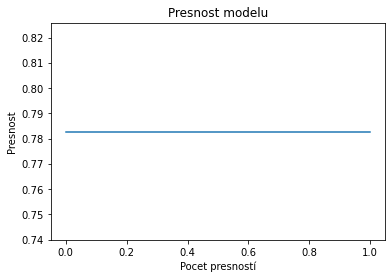

In [31]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.fit_transform(X_Test)

#vytvoríme si klasifikátor, ktorý nám dáta rozdelí
#aktivačná funkcia je nastavená na linearnu
#random_state je nastavený na 1, čiže sa údaje pomiešajú náhodne
classifier = SVC(kernel="linear", random_state=1)
#natrénujeme si neuronovú sieť pomocou príkazu fit
classifier.fit(X_Train, Y_Train)

score = classifier.score(X_Train,Y_Train)
list.append(score)

plt.plot(list)
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Pocet presností')
plt.show()

In [21]:
list

[0.7828282828282829]

In [22]:
finalScore = classifier.score(X_Train, Y_Train)

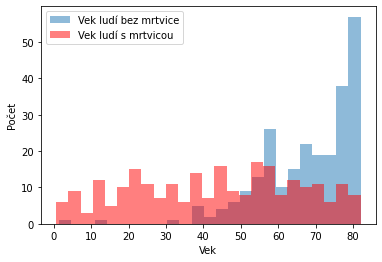

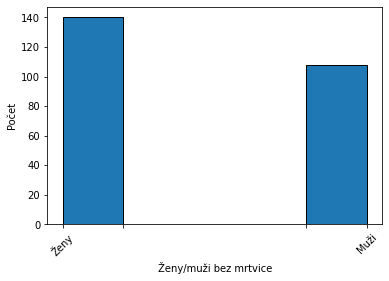

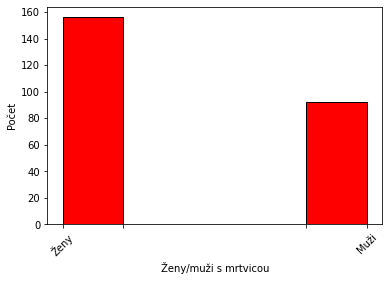

In [23]:
plt.hist(X[:248, 1], alpha = 0.5, bins=25,label = "Vek ludí bez mrtvice")
plt.hist(X[248:496, 1], alpha= 0.5, bins=25,label = "Vek ludí s mrtvicou", color="red")
plt.xlabel("Vek")
plt.ylabel("Počet")
plt.legend()
plt.show()

ax = plt.subplot(111)
bins = [0.0,0.2,0.8,1.0]
ax.hist(X[:248,0], bins=bins, edgecolor="k")
ax.set_xticks(bins)
ax.set_xlabel("Ženy/muži bez mrtvice")
ax.set_ylabel("Počet")
ax.set_xticklabels(["Ženy", "", "", "Muži"],rotation=45)
plt.show()

ax = plt.subplot(111)
bins = [0.0,0.2,0.8,1.0]
ax.hist(X[248:496,0], bins=bins, edgecolor="k", color="red")
ax.set_xticks(bins)
ax.set_xlabel("Ženy/muži s mrtvicou")
ax.set_ylabel("Počet")
ax.set_xticklabels(["Ženy", "", "", "Muži"],rotation=45)
plt.show()


In [29]:
def vratPredikciu(pohlavie, vek, hypertenzia, choroby_srdca, zenaty):
    dataset = pd.DataFrame({"gender":pohlavie,"age":vek,"hypertension":hypertenzia,"heart_disease":choroby_srdca,"ever_married":zenaty},index=[0])
    X = sc_X.transform(dataset)
    classificationPrediction = classifier.predict(X)
    skore = finalScore*100
    
    string = "{"
    if(pohlavie==1): string+="Muž: "
    else: string+="Žena: "
    string += str(vek)+" rokov, hypertenzia: " 
    if(hypertenzia==0): string+="NIE, srdcové choroby: "
    else: string+="ÁNO, srdcové choroby: "
    if(choroby_srdca==0): string+="NIE, manželstvo: "
    else: string+="ÁNO, manželstvo: "
    if(zenaty==0): string+="NIE} = "
    else: string+="ÁNO} = "
            
    if(classificationPrediction[0]==0):
        return string+"Mŕtvicu NEDOSTANE, Presnost: "+str(round(skore,2))+"%"
    else:
        return string+"Mŕtvicu DOSTANE, Presnost: "+str(round(skore,2))+"%"

In [30]:
for i in range(15):
    vek = random.randint(1,82)
    pohlavie = random.randint(0,1)
    hypertenzia = random.randint(0,1)
    choroby_srdca = random.randint(0,1)
    manzelstvo = random.randint(0,1)
    print(vratPredikciu(pohlavie, vek, hypertenzia, choroby_srdca, manzelstvo))

{Muž: 30 rokov, hypertenzia: NIE, srdcové choroby: NIE, manželstvo: NIE} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Muž: 37 rokov, hypertenzia: NIE, srdcové choroby: NIE, manželstvo: NIE} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Muž: 67 rokov, hypertenzia: ÁNO, srdcové choroby: NIE, manželstvo: NIE} = Mŕtvicu DOSTANE, Presnost: 78.28%
{Muž: 14 rokov, hypertenzia: NIE, srdcové choroby: ÁNO, manželstvo: ÁNO} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Žena: 30 rokov, hypertenzia: ÁNO, srdcové choroby: NIE, manželstvo: ÁNO} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Muž: 29 rokov, hypertenzia: ÁNO, srdcové choroby: NIE, manželstvo: ÁNO} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Žena: 41 rokov, hypertenzia: NIE, srdcové choroby: ÁNO, manželstvo: ÁNO} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Žena: 24 rokov, hypertenzia: NIE, srdcové choroby: ÁNO, manželstvo: NIE} = Mŕtvicu NEDOSTANE, Presnost: 78.28%
{Muž: 56 rokov, hypertenzia: ÁNO, srdcové choroby: ÁNO, manželstvo: ÁNO} = Mŕtvicu DOSTANE, Presnost: 78.28%
{M